Can Berk Durak
20190702043
Credit Score Predictor dataset analysis

Reading the training data


In [8]:
import numpy as np
import pandas as pd
dataset = pd.read_csv('/CreditScore_train.csv')
dataset.head()


,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x296,x297,x298,x299,x300,x301,x302,x303,x304,y
0,1084094,426.0,39.0,128.0,426.0,0,0,0,0,0,...,0,NaN,0,0,0,0,NaN,0,NaN,807
1,1287777,160.0,2.0,64.0,160.0,1,1,2,0,1,...,17318,0.8417,1,1,1,0,NaN,0,NaN,819
2,1483016,163.0,16.0,104.0,239.0,0,0,0,1,0,...,0,NaN,0,0,0,0,NaN,0,NaN,803
3,959054,NaN,NaN,NaN,102.0,0,0,0,0,0,...,0,NaN,1,1,1,0,NaN,0,NaN,530
4,1342113,3.0,2.0,2.0,62.0,0,2,2,0,0,...,17413,1.0180,1,1,1,0,NaN,0,NaN,485


# New section

Cleaning and prepearing data

# New section

In [10]:
dataset = dataset.dropna()
dataset = dataset.drop_duplicates()
dataset.head()

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x296,x297,x298,x299,x300,x301,x302,x303,x304,y
2141,1317339,212.0,1.0,61.0,212.0,0,4,8,8,1,...,55384,0.9541,1,1,1,1,5.0,34804,1.2410,532
3280,1631888,159.0,1.0,64.0,159.0,0,1,3,3,10,...,5710,1.0000,1,1,1,0,5.0,26532,0.8258,543
3764,858997,61.0,7.0,16.0,61.0,0,0,7,1,0,...,14330,0.8964,1,1,1,1,5.0,9839,1.1952,409
6548,1144453,208.0,10.0,87.0,208.0,1,0,3,2,0,...,11035,0.8062,1,1,1,1,4.0,3576,0.9192,493
12889,1479800,53.0,4.0,25.0,142.0,0,1,1,5,2,...,56263,0.8839,1,1,1,0,1.0,16277,1.0851,578


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression

scaler = StandardScaler()
dataset = pd.DataFrame(scaler.fit_transform(dataset), columns=dataset.columns)
X = dataset.drop('x001', axis=1)
y = dataset['x001']

X_selected = SelectKBest(f_regression, k=10).fit_transform(X, y)
dataset.head()


,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x296,x297,x298,x299,x300,x301,x302,x303,x304,y
0,0.521961,1.764089,-0.719341,0.222999,0.909489,-0.707107,2.245682,2.249743,0.197149,-0.640257,...,0.248366,0.076433,0.0,0.0,0.0,0.894427,0.566393,-0.260626,0.232840,0.499443
1,1.863076,0.724595,-0.719341,0.324192,-0.036697,-0.707107,-0.042371,-0.025278,-0.375218,1.393501,...,-0.807571,0.214796,0.0,0.0,0.0,-1.118034,0.566393,-0.437640,-1.605285,0.696828
2,-1.432232,-1.197488,-0.168356,-1.294896,-1.786248,-0.707107,-0.805056,1.794738,-0.604165,-0.866230,...,-0.624333,-0.097500,0.0,0.0,0.0,0.894427,0.566393,-0.794855,0.030080,-1.707676
3,-0.215158,1.685636,0.107136,1.100005,0.838079,1.414214,-0.805056,-0.025278,-0.489692,-0.866230,...,-0.694376,-0.369403,0.0,0.0,0.0,0.894427,0.123129,-0.928878,-1.191796,-0.200375
4,1.214631,-1.354393,-0.443849,-0.991317,-0.340191,-0.707107,-0.042371,-0.935286,-0.146271,-0.414284,...,0.267051,-0.135181,0.0,0.0,0.0,-1.118034,-1.206662,-0.657088,-0.457342,1.324870


Regression Analysis

In [12]:
import statsmodels.api as sm

X = sm.add_constant(X)
y = dataset['x001']

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   x001   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 17 Jan 2024   Prob (F-statistic):                nan
Time:                        04:58:31   Log-Likelihood:                 573.35
No. Observations:                  18   AIC:                            -1111.
Df Residuals:                       0   BIC:                            -1095.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.939e-18        inf         -0        n

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1529: RuntimeWarning: invalid value encountered in multiply
  cov_p = self.normalized_cov_params * scale


Descriptive Analytics


In [13]:
dataset.describe()

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x296,x297,x298,x299,x300,x301,x302,x303,x304,y
count,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,...,1.800000e+01,1.800000e+01,18.0,18.0,18.0,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01
mean,-4.101657e-16,-6.476301e-17,-4.934325e-17,1.171902e-16,2.097088e-16,6.167906e-17,-3.700743e-17,1.110223e-16,4.317534e-17,-4.317534e-17,...,6.167906e-17,-6.476301e-17,0.0,0.0,0.0,-9.868649e-17,6.167906e-18,-8.018277e-17,-6.784696e-16,-3.577385e-16
std,1.028992e+00,1.028992e+00,1.028992e+00,1.028992e+00,1.028992e+00,1.028992e+00,1.028992e+00,1.028992e+00,1.028992e+00,1.028992e+00,...,1.028992e+00,1.028992e+00,0.0,0.0,0.0,1.028992e+00,1.028992e+00,1.028992e+00,1.028992e+00,1.028992e+00
min,-1.529289e+00,-1.472072e+00,-7.193409e-01,-1.294896e+00,-1.786248e+00,-7.071068e-01,-8.050558e-01,-1.390290e+00,-7.186382e-01,-8.662301e-01,...,-8.075713e-01,-2.019508e+00,0.0,0.0,0.0,-1.118034e+00,-1.206662e+00,-9.288780e-01,-1.605285e+00,-1.707676e+00
25%,-8.601579e-01,-1.016067e+00,-5.127217e-01,-8.563926e-01,-4.696217e-01,-7.071068e-01,-8.050558e-01,-9.352863e-01,-6.041649e-01,-8.662301e-01,...,-6.718431e-01,-4.323294e-01,0.0,0.0,0.0,-1.118034e+00,-1.206662e+00,-7.582788e-01,-5.692370e-01,-3.708438e-01
50%,7.540887e-02,1.460086e-01,-2.142718e-01,-4.010241e-01,-2.777066e-02,-7.071068e-01,-4.237136e-02,-2.527801e-02,-3.752182e-01,-5.272705e-01,...,-5.243915e-01,-1.163407e-01,0.0,0.0,0.0,8.944272e-01,1.231288e-01,-3.577352e-01,-4.004544e-01,-2.990676e-03
75%,5.777030e-01,6.461424e-01,-7.652563e-03,6.868006e-01,3.203544e-01,1.414214e+00,-4.237136e-02,4.297261e-01,1.685302e-01,4.896083e-01,...,3.704311e-01,2.652121e-01,0.0,0.0,0.0,8.944272e-01,5.663925e-01,4.853691e-01,4.612776e-01,4.500968e-01
max,1.863076e+00,1.764089e+00,3.688535e+00,1.977011e+00,3.016092e+00,1.414214e+00,2.245682e+00,2.249743e+00,3.631349e+00,2.523366e+00,...,3.415030e+00,2.711355e+00,0.0,0.0,0.0,8.944272e-01,2.339447e+00,2.916439e+00,2.338361e+00,2.222072e+00


Corelattion Analysis

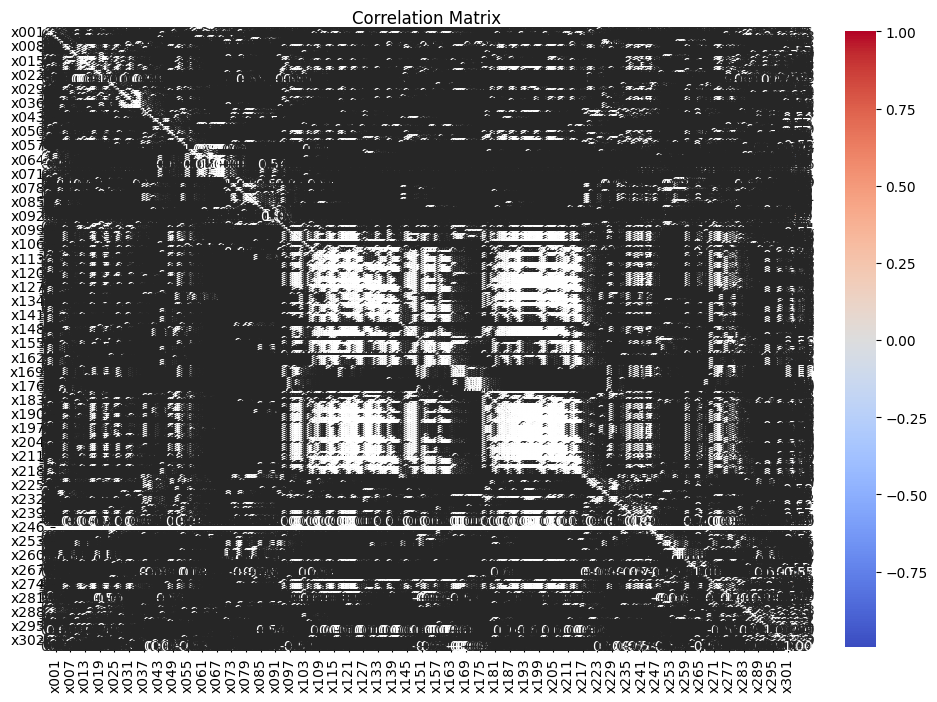

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


correlation_matrix = dataset.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Train dataset was analyzed, now lets evaluate the model by using test and train datasets

In [16]:
train= pd.read_csv("/CreditScore_train.csv")
test= pd.read_csv("/content/CreditScore_test.csv")

In [17]:
print("Train Data Shape b4 adding target col : ",train.shape)
print("Test Data Shape b4 adding target col : ",test.shape)

Train Data Shape b4 adding target col :  (80000, 305)
Test Data Shape b4 adding target col :  (20000, 305)


In [18]:
train["source"] = "train"
test["source"] = "test"
print("Train Data Shape aftr adding target col : ",train.shape)
print("Test Data Shape aftr adding target col : ",test.shape)

Train Data Shape aftr adding target col :  (80000, 306)
Test Data Shape aftr adding target col :  (20000, 306)


Separate out the Train/Test and Validation Data

In [25]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (16, 305)
Unseen Data For Predictions: (2, 305)


In [31]:
df_concat = pd.concat([train,test])
df_concat.shape

(100000, 306)

In [32]:
df_concat.head(5)

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x297,x298,x299,x300,x301,x302,x303,x304,y,source
0,1084094,426.0,39.0,128.0,426.0,0,0,0,0,0,...,NaN,0,0,0,0,NaN,0,NaN,807,train
1,1287777,160.0,2.0,64.0,160.0,1,1,2,0,1,...,0.8417,1,1,1,0,NaN,0,NaN,819,train
2,1483016,163.0,16.0,104.0,239.0,0,0,0,1,0,...,NaN,0,0,0,0,NaN,0,NaN,803,train
3,959054,NaN,NaN,NaN,102.0,0,0,0,0,0,...,NaN,1,1,1,0,NaN,0,NaN,530,train
4,1342113,3.0,2.0,2.0,62.0,0,2,2,0,0,...,1.0180,1,1,1,0,NaN,0,NaN,485,train


checking data types

In [34]:
df_concat.dtypes

x001        int64
x002      float64
x003      float64
x004      float64
x005      float64
           ...   
x302      float64
x303        int64
x304      float64
y           int64
source     object
Length: 306, dtype: object

In [35]:
df_concat.duplicated().sum()

0

now lets make descriptive analysis by using describe() function

In [38]:
df_concat.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
x001,100000.0,NaN,NaN,NaN,1218243.8211,272897.724977,517.0,974363.5,1235926.0,1445326.25,1677197.0
x002,78568.0,NaN,NaN,NaN,125.711727,115.785117,0.0,32.0,100.0,180.0,718.0
x003,78568.0,NaN,NaN,NaN,25.541238,49.028751,0.0,3.0,8.0,24.0,704.0
x004,78576.0,NaN,NaN,NaN,65.393212,63.592317,0.0,19.0,48.0,92.0,704.0
x005,93890.0,NaN,NaN,NaN,178.238545,124.520628,0.0,87.0,150.0,246.0,827.0
...,...,...,...,...,...,...,...,...,...,...,...
x302,26931.0,NaN,NaN,NaN,2.948758,2.12943,1.0,1.0,1.0,5.0,9.0
x303,100000.0,NaN,NaN,NaN,6410.88291,24190.243313,0.0,0.0,0.0,0.0,785537.0
x304,18125.0,NaN,NaN,NaN,1.037957,0.33058,0.0,0.9758,1.0486,1.1862,5.1569
y,100000.0,NaN,NaN,NaN,619.19823,118.461932,300.0,524.0,599.0,720.0,839.0


Missing data
Important questions when thinking about missing data:
How prevalent is the missing data?
Is missing data random or does it have a pattern?

In [39]:
total = df_concat.count()
sumcol=df_concat.isnull().sum()
countcol=df_concat.isnull().count()

percent = (df_concat.isnull().sum()/countcol*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent,sumcol,countcol], axis=1, keys=['Total', 'Percent','Sumcol','countcol'])
#missing_data.head(20)
miss_perc=missing_data.sort_values(['Percent'], axis=0, ascending=False)
m_per = miss_perc[miss_perc.Percent > 60]
print(m_per)

      Total  Percent  Sumcol  countcol
x242   6661   93.339   93339    100000
x295  13467   86.533   86533    100000
x304  18125   81.875   81875    100000
x098  19319   80.681   80681    100000
x155  20949   79.051   79051    100000
x259  22568   77.432   77432    100000
x257  23087   76.913   76913    100000
x256  23087   76.913   76913    100000
x255  23087   76.913   76913    100000
x302  26931   73.069   73069    100000
x268  32747   67.253   67253    100000
x162  33519   66.481   66481    100000
x267  33539   66.461   66461    100000
x265  33539   66.461   66461    100000
x266  33539   66.461   66461    100000
x253  33667   66.333   66333    100000


In [41]:
drop_cols=m_per.index
print(drop_cols)
filt_concat_df=df_concat.drop(columns=drop_cols,axis=1)
print(filt_concat_df.shape)

Index(['x242', 'x295', 'x304', 'x098', 'x155', 'x259', 'x257', 'x256', 'x255',
       'x302', 'x268', 'x162', 'x267', 'x265', 'x266', 'x253'],
      dtype='object')
(100000, 290)


Exploratory Analysis

In [43]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

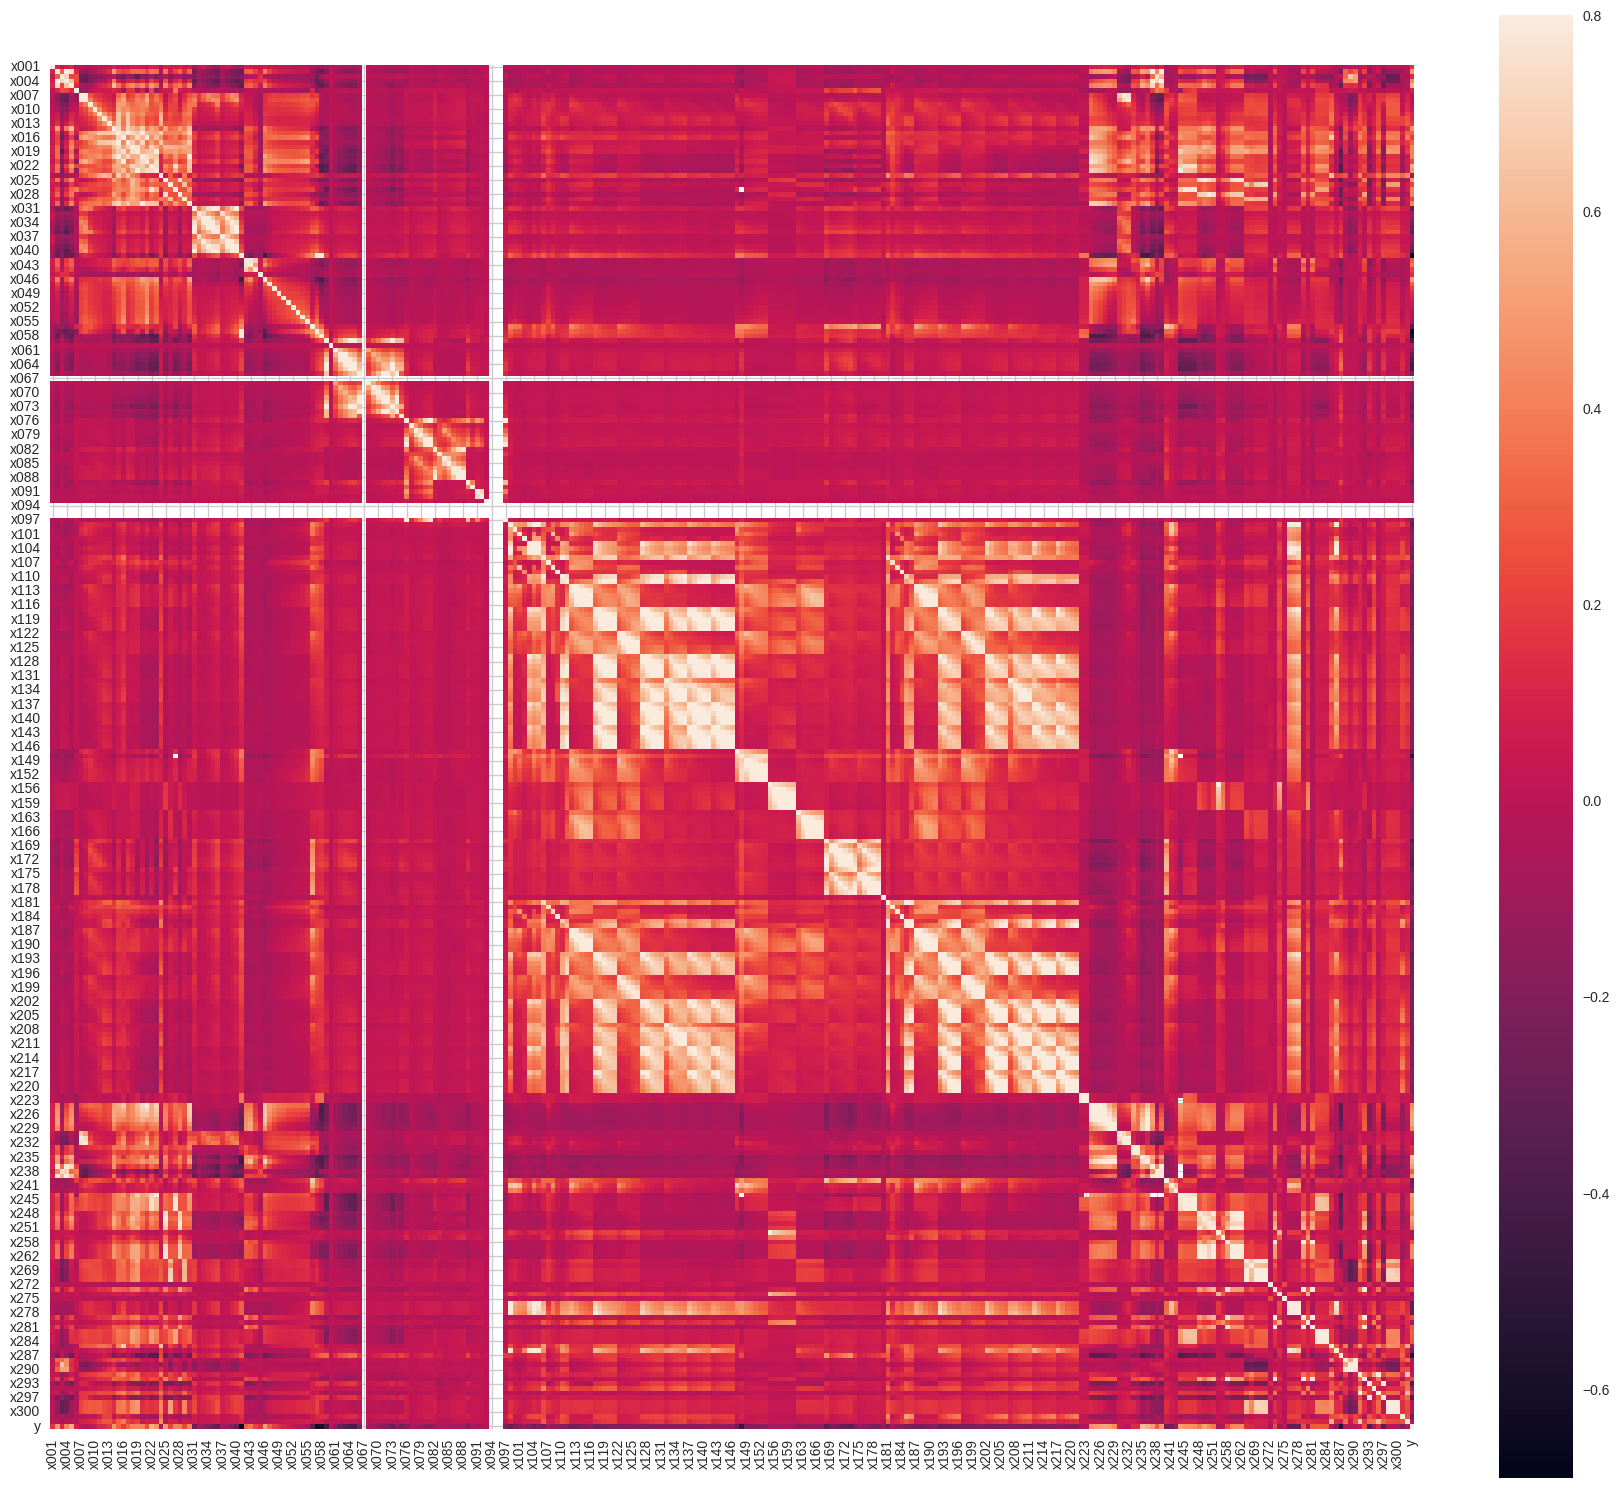

In [44]:
corrmat=filt_concat_df.corr()
plt.figure(figsize=(22,19))
sns.heatmap(corrmat,vmax=0.8,square=True)
plt.show()

In [51]:
cor_target = abs(filt_concat_df.corr()["y"])
relevant_features = cor_target[cor_target<0.3]
relevant_features

x001    0.164841
x003    0.121207
x006    0.092144
x007    0.008623
x008    0.021920
          ...   
x298    0.044329
x299    0.044871
x300    0.040356
x301    0.224484
x303    0.035370
Name: y, Length: 225, dtype: float64

In [52]:
type(relevant_features)
relevant_features.item

<bound method IndexOpsMixin.item of x001    0.164841
x003    0.121207
x006    0.092144
x007    0.008623
x008    0.021920
          ...   
x298    0.044329
x299    0.044871
x300    0.040356
x301    0.224484
x303    0.035370
Name: y, Length: 225, dtype: float64>

In [48]:
lst_key=[]
null_key=[]
filt_concat_df.shape

(100000, 290)

In [53]:
for i,j in relevant_features.items():
    lst_key.append(i)
#print(lst_key.count())
final_df=filt_concat_df.drop(columns=lst_key,axis=1)
print(final_df.shape)

(100000, 65)


In [54]:
a=final_df.isnull().any()==True
type(a)

pandas.core.series.Series

In [55]:
for i,j in a.items():
    if j==True:
        null_key.append(i)
print(null_key)

['x002', 'x004', 'x005', 'x041', 'x057', 'x058', 'x148', 'x235', 'x237', 'x239', 'x287', 'x293', 'x297']


In [56]:
for i in null_key:
    final_df[i].fillna(final_df[i].mean(),inplace=True)
final_df.shape

(100000, 65)

In [57]:
train_final = final_df[final_df.source=="train"]
test_final = final_df[final_df.source=="test"]
print(train_final.shape)
print(test_final.shape)
train_final.drop(columns="source",inplace=True)
test_final.drop(columns="source",inplace=True)

(80000, 65)
(20000, 65)


Now lets visualize the dataset

<Axes: >

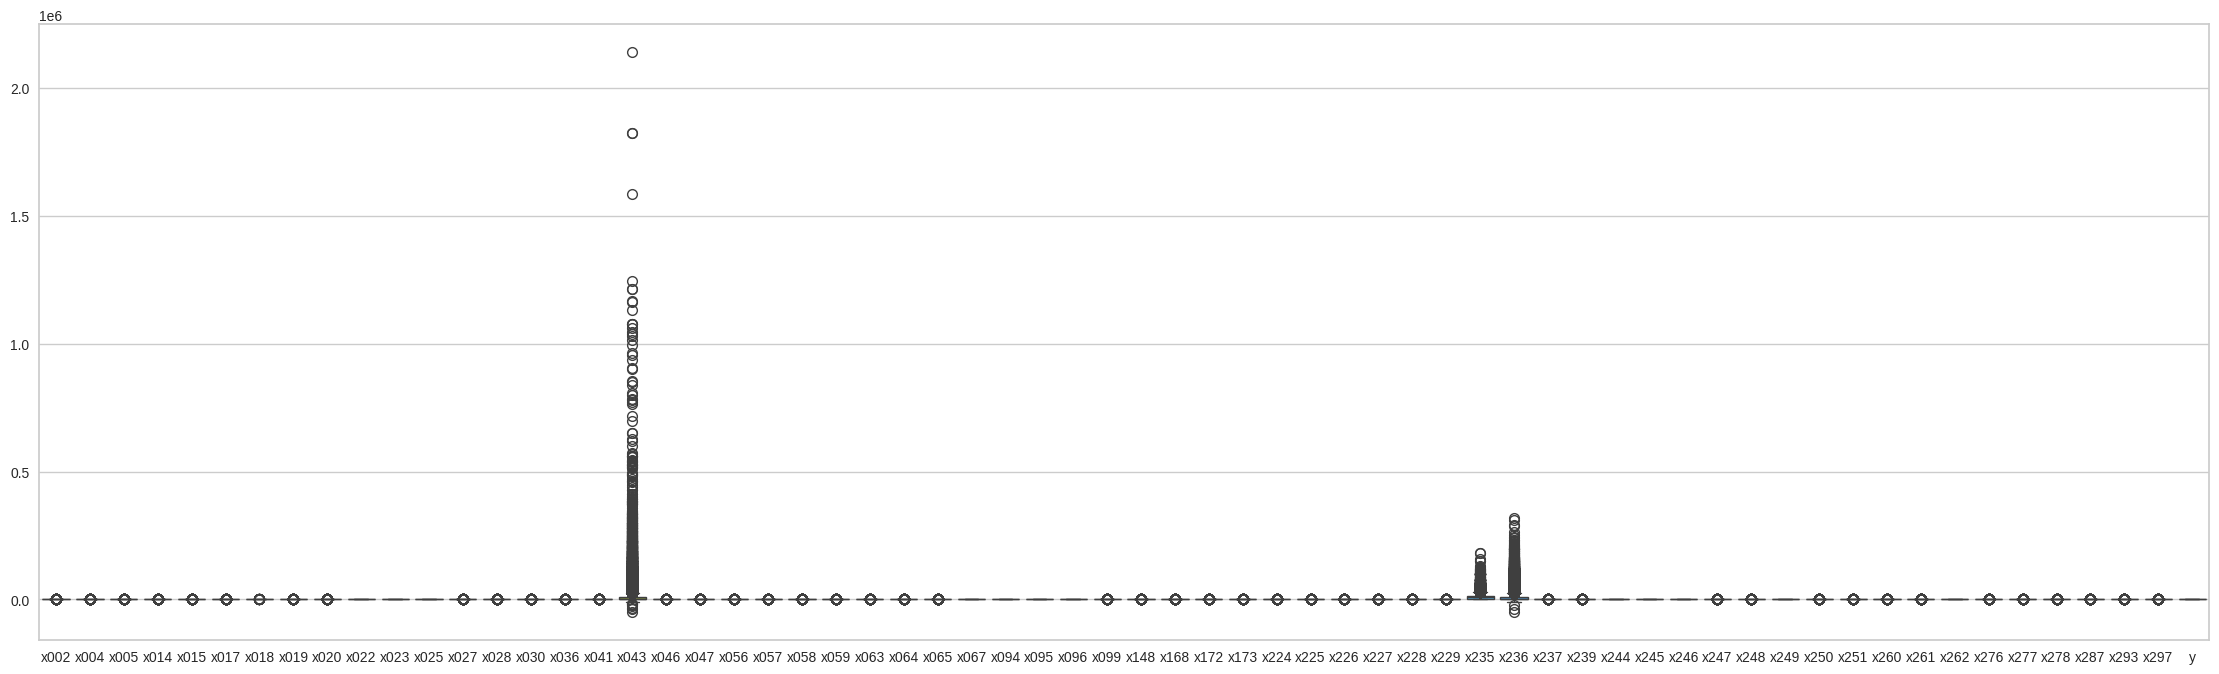

In [59]:
%matplotlib inline
plt.figure(figsize = (28,8))
sns.boxplot(data=train_final)

Training regression model

In [60]:
train_final.head()

,x002,x004,x005,x014,x015,x017,x018,x019,x020,x022,...,x260,x261,x262,x276,x277,x278,x287,x293,x297,y
0,426.000000,128.000000,426.0,9,19,14,8,5,6,3,...,1,1,1,0,0,0,1.000000,0.812575,0.794034,807
1,160.000000,64.000000,160.0,5,21,16,5,3,9,3,...,1,1,1,0,0,0,1.000000,0.841700,0.841700,819
2,163.000000,104.000000,239.0,6,8,5,4,2,7,3,...,0,0,0,0,0,0,3.239309,0.812575,0.794034,803
3,125.711727,65.393212,102.0,0,4,4,2,0,0,0,...,0,0,0,0,0,0,9.000000,0.812575,0.794034,530
4,3.000000,2.000000,62.0,0,5,3,2,2,2,1,...,0,0,0,1,1,1,9.000000,1.018000,1.018000,485


In [61]:
X = train_final.drop("y", axis=1)
Y = train_final["y"]
print(X.shape)
print(Y.shape)

(80000, 63)
(80000,)


as we an see above there is different data disturbitions so lets standardize them

In [62]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler().fit(X)
scaled_X = scaler.transform(X)

we will split the data into train and test set

In [63]:
from sklearn.model_selection import train_test_split

seed      = 42
test_size = 0.20

X_train, X_test, Y_train, Y_test = train_test_split(scaled_X, Y, test_size = test_size, random_state = seed)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(64000, 63)
(16000, 63)
(64000,)
(16000,)


Now lets use different Regression models offered by scikit-learn to produce a baseline accuracy for this problem.

We will use the MAE (Mean Absolute Error) as the performance metric for the regression models.

I faced some errors while i was trying the compare all regression models so i have decided to compare only Gradient Boosting Regression and Randam Forest models.

In [77]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
model = GradientBoostingRegressor()
model.fit(X_train,Y_train)

#Predicting TEST & TRAIN DATA
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

error_percent = np.mean(np.abs((Y_train - train_predict) / Y_train)) * 100
print("MAPE - Mean Absolute Percentage Error (TRAIN DATA): ",error_percent )
Y_train, train_predict = np.array(Y_train), np.array(train_predict)

MAPE - Mean Absolute Percentage Error (TRAIN DATA):  4.691643158340478


In [78]:
model = RandomForestRegressor()
model.fit(X_train,Y_train)

#Predicting TEST & TRAIN DATA
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

error_percent = np.mean(np.abs((Y_train - train_predict) / Y_train)) * 100
print("MAPE - Mean Absolute Percentage Error (TRAIN DATA): ",error_percent )
Y_train, train_predict = np.array(Y_train), np.array(train_predict)

MAPE - Mean Absolute Percentage Error (TRAIN DATA):  1.5935224104622343


In [79]:
model = RandomForestRegressor()
model.fit(X_test,Y_test)

#Predicting TEST & TRAIN DATA
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

error_percent = np.mean(np.abs((Y_test - test_predict) / Y_test)) * 100
print("MAPE - Mean Absolute Percentage Error (TEST DATA): ",error_percent )
Y_test, test_predict = np.array(Y_test), np.array(test_predict)

MAPE - Mean Absolute Percentage Error (TEST DATA):  1.6990274121736826


In [80]:
model = GradientBoostingRegressor()
model.fit(X_test,Y_test)

#Predicting TEST & TRAIN DATA
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

error_percent = np.mean(np.abs((Y_test - test_predict) / Y_test)) * 100
print("MAPE - Mean Absolute Percentage Error (TEST DATA): ",error_percent )
Y_test, test_predict = np.array(Y_test), np.array(test_predict)

MAPE - Mean Absolute Percentage Error (TEST DATA):  4.575102092073961


So, we can see that best regression model is Random Forest Regression for this dataset